# 1. Basic operations

In [14]:
import sys
from pathlib import Path
sys.path.append(str(Path("../../").resolve()))

%load_ext autoreload
%autoreload 2

In [124]:
import pipeGEM as pg
from pipeGEM.data.fetching import list_models, load_model
from pipeGEM.utils import get_subsystems
import cobra

## Get model from [BiGG](http://bigg.ucsd.edu/) or [Metabolic atlas](https://metabolicatlas.org/)

In [6]:
model_list = list_models(organism="E. coli")

In [8]:
model_list.head()

,id,organism,reaction_count,metabolite_count,gene_count,database
0,e_coli_core,Escherichia coli str. K-12 substr. MG1655,95,72,137,BiGG
2,iAF1260,Escherichia coli str. K-12 substr. MG1655,2382,1668,1261,BiGG
3,iAF1260b,Escherichia coli str. K-12 substr. MG1655,2388,1668,1261,BiGG
11,iAPECO1_1312,Escherichia coli APEC O1,2735,1942,1313,BiGG
13,iB21_1397,Escherichia coli BL21(DE3),2741,1943,1337,BiGG


In [190]:
ecoli = load_model("e_coli_core")

In [17]:
ecoli

Name,e_coli_core
Memory address,0x07ff53d54e940
Number of metabolites,72
Number of reactions,95
Number of groups,0
Objective expression,1.0*BIOMASS_Ecoli_core_w_GAM - 1.0*BIOMASS_Ecoli_core_w_GAM_reverse_712e5
Compartments,"extracellular space, cytosol"


## Create Model object

In [19]:
pg_mod = pg.Model(model=ecoli, name_tag="ecoli")

In [23]:
pg_mod

Name,e_coli_core
Memory address,0x07ff53d54e940
Number of metabolites,72
Number of reactions,95
Number of groups,0
Objective expression,1.0*BIOMASS_Ecoli_core_w_GAM - 1.0*BIOMASS_Ecoli_core_w_GAM_reverse_712e5
Compartments,"extracellular space, cytosol"


In [25]:
# basic information

pg_mod.n_rxns, pg_mod.n_genes, pg_mod.n_mets

(95, 137, 72)

In [22]:
# flux analysis using get_flux

pg_mod.do_flux_analysis(method="pFBA")

No post processing method found, an identical frame was returned


,fluxes
PFK,7.477382
PFL,0.000000
PGI,4.860861
PGK,-16.023526
PGL,4.959985
...,...
NADH16,38.534610
NADTRHD,0.000000
NH4t,4.765319
O2t,21.799493


In [30]:
# flux sampling using get_flux

pg_mod.do_flux_analysis(method="sampling", n=30)

No post processing method found, an identical frame was returned


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
PFK,11.069539,8.184565,9.600815,6.273322,9.157038,6.808347,16.507180,7.715213,9.992912,8.263338,...,19.517751,19.139459,16.184913,12.642122,16.001916,13.299447,9.999730,9.784535,10.539288,16.018844
PFL,2.093587,3.494939,6.670567,11.755891,14.114923,12.935688,7.706251,9.712451,15.428209,14.474510,...,1.686354,1.454600,1.803936,0.870710,2.567081,0.408517,1.806827,5.553893,7.685214,10.178554
PGI,9.954659,3.871284,8.411449,-1.231047,0.044401,1.552049,2.471307,1.127718,7.517981,2.639114,...,5.575560,-2.951149,-4.920212,3.633695,3.974976,-0.415964,1.048075,5.432417,8.611827,5.632436
PGK,-19.932482,-15.353607,-18.144162,-13.561666,-16.424573,-16.109723,-17.429567,-16.457962,-18.427363,-17.040989,...,-17.539341,-14.974706,-14.440840,-16.376180,-17.741943,-16.046964,-16.813160,-17.910062,-19.097964,-18.465929
PGL,0.014387,4.592402,0.840777,9.625327,9.852892,7.805475,7.493248,8.568154,2.195196,7.139404,...,3.909916,12.577374,14.573571,5.523792,5.941465,10.202439,8.927763,4.257530,1.126369,4.326089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NADH16,54.410327,43.203437,58.509507,47.537860,55.668397,64.764685,50.295263,47.327416,49.916412,38.455542,...,58.886830,66.390052,70.495503,57.028613,67.406927,77.645365,71.208129,51.480421,47.585583,41.067659
NADTRHD,12.122057,27.513675,44.808715,27.665057,39.800493,56.045725,26.204017,29.446911,32.838096,39.383661,...,41.380109,31.022021,39.265781,42.040551,26.819623,40.019856,54.010226,65.629595,12.891747,23.555242
NH4t,0.022490,0.139295,0.342239,0.662271,0.329883,0.636380,1.174756,0.793290,1.101768,0.980770,...,0.397769,1.565622,1.169001,0.538520,0.273257,1.163602,0.609367,0.266569,0.845943,1.065999
O2t,28.732988,22.844253,34.453241,26.757231,32.151746,37.892490,27.819013,26.493432,29.670660,21.824843,...,32.940072,36.439709,38.530094,32.150317,38.145341,43.747805,39.981009,28.800443,26.656852,22.002467


## Create Group object

In [31]:
from pipeGEM.utils import random_perturb

In [191]:
# create different models

models = [random_perturb(ecoli, 
                         in_place=False, 
                         structure_ratio=0.8,
                         constr_ratio=0.8, 
                         random_state=i) for i in range(9)]

In [37]:
# The first way to initialize Group is to use a dict of cobra.model dicts (str as keys)

grp = pg.Group({"G1": {f"m{i+1}": models[i] for i in range(3)},
               "G2": {f"m{i+1}": models[i] for i in range(3, 6)},
               "G3": {f"m{i+1}": models[i] for i in range(6, 9)}})

In [46]:
# browse the group structure

grp

Group [None]
├── G1 (Group) ── 3
├── G2 (Group) ── 3
└── G3 (Group) ── 3

In [39]:
# browse the group table

grp.get_info()

,group_0,group_1
0,G1,m1
1,G1,m2
2,G1,m3
3,G2,m4
4,G2,m5
5,G2,m6
6,G3,m7
7,G3,m8
8,G3,m9


In [43]:
# select one group / model by name_tag

grp["G1"]

Group [G1]
├── m1 (Model)
├── m2 (Model)
└── m3 (Model)

In [58]:
grp["G1"].get_info()

,group_0
0,m1
1,m2
2,m3


In [47]:
# The model will become a pg.Model

type(grp["G1"]["m1"])

pipeGEM.core._model.Model

In [192]:
# The second way to initialize Group is to use a dict of pipeGEM.Model lists

grp = pg.Group({"G1": [pg.Model(models[i], f"m{i+1}") for i in range(3)],
               "G2": [pg.Model(models[i], f"m{i+1}") for i in range(3, 6)],
               "G3": [pg.Model(models[i], f"m{i+1}") for i in range(6, 9)]})

## Comparisons

## Visualizations

In [131]:
from pipeGEM.pipeline.algo import SwiftCC

In [132]:
swiftcc = SwiftCC()

In [70]:
iML1515 = load_model("iML1515")

In [100]:
models = [swiftcc(random_perturb(iML1515, 
                                 in_place=False, 
                                 structure_ratio=0.99,
                                 constr_ratio=0.7, 
                                 random_state=i),
                 return_model=True)["model"] for i in range(3)]

In [110]:
grp = pg.Group({"G1": {f"m{i+1}": swiftcc(random_perturb(models[0],
                                                in_place=False, 
                                                structure_ratio=0.99,
                                                constr_ratio=0.95, random_state=i),
                                          return_model=True)["model"]
                       for i in range(3)},
               "G2": {f"m{i+1}": swiftcc(random_perturb(models[1],
                                                in_place=False, 
                                                structure_ratio=0.975,
                                                constr_ratio=0.9, random_state=i),
                                          return_model=True)["model"]
                      for i in range(3, 6)},
               "G3": {f"m{i+1}": swiftcc(random_perturb(models[2],
                                                in_place=False, 
                                                structure_ratio=0.95,
                                                constr_ratio=0.8, random_state=i),
                                          return_model=True)["model"] 
                      for i in range(6, 9)}})

saving  None


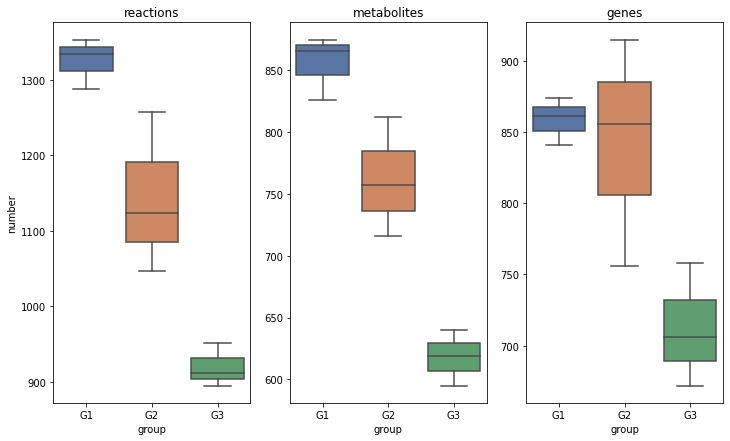

,group,obj,component,number
0,G1,m1,n_rxns,1288
1,G1,m2,n_rxns,1353
2,G1,m3,n_rxns,1334
3,G2,m4,n_rxns,1047
4,G2,m5,n_rxns,1257
5,G2,m6,n_rxns,1124
6,G3,m7,n_rxns,951
7,G3,m8,n_rxns,895
8,G3,m9,n_rxns,912
9,G1,m1,n_mets,826


In [111]:
grp.plot_components()

saving  None


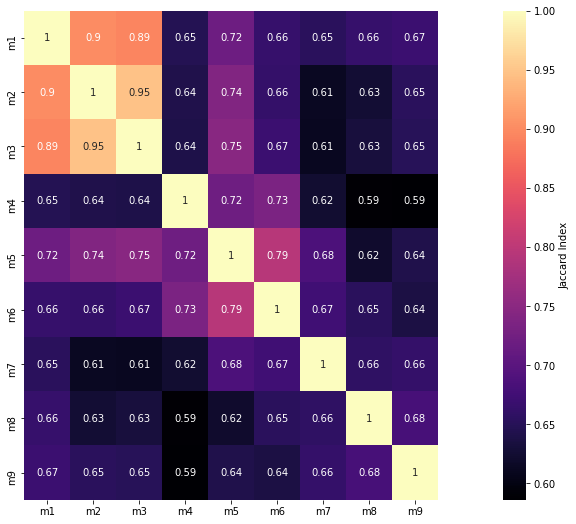

In [112]:
grp.plot_model_heatmap()

m1
m2
m3
m4
m5
m6
m7
m8
m9


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/matrix.py:1216: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


saving  None


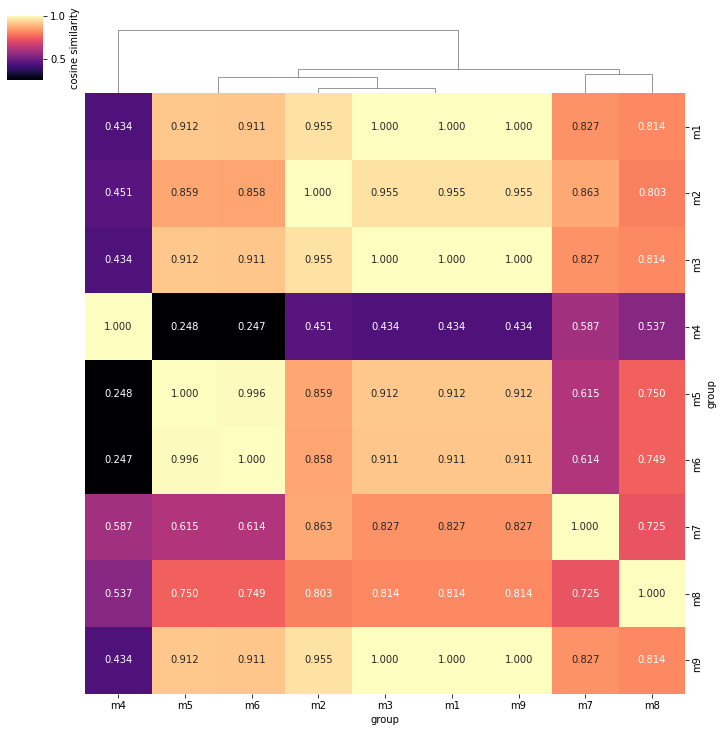

In [137]:
grp.plot_flux_heatmap(method="pFBA", constr="None", annot=True)

saving  None


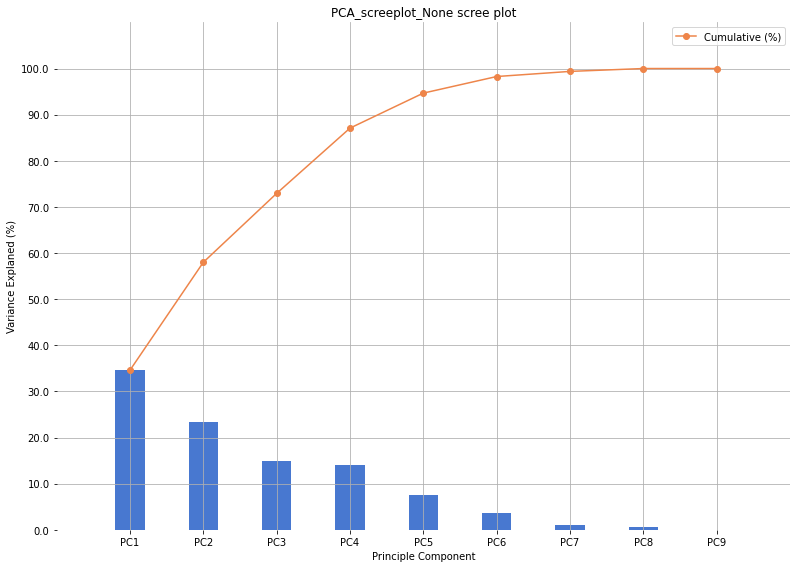

saving  None


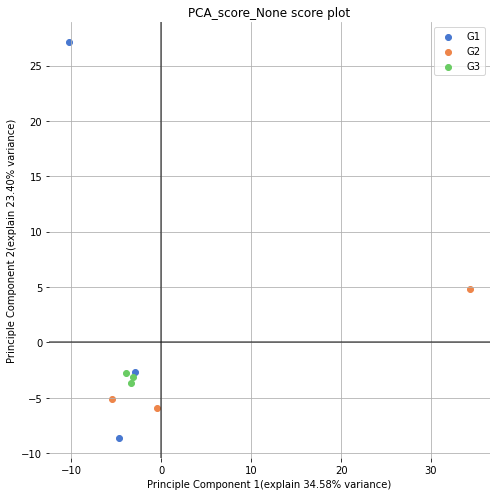

In [148]:
grp.plot_flux_emb(method="pFBA", constr="None", show_groups=True)

m1
m2
m3
m4
m5
m6
m7
m8
m9


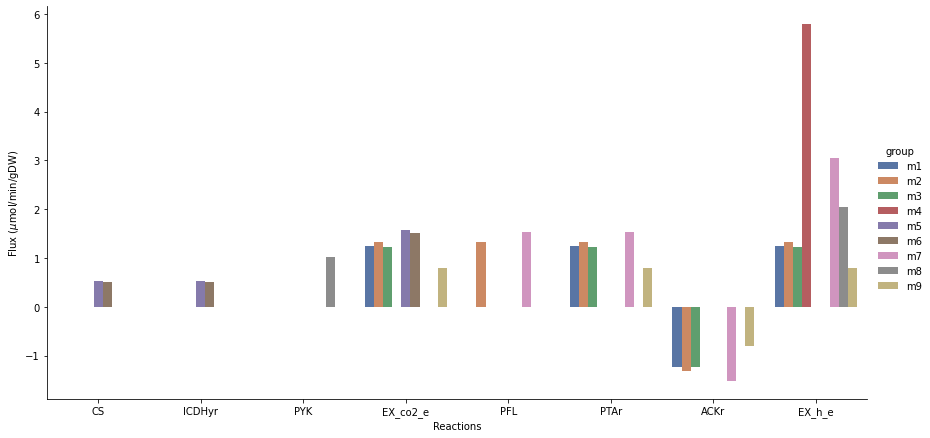

In [135]:
grp.plot_flux(method="pFBA", constr="None", rxn_ids=[r.id for r in iML1515.reactions[:100]])

In [139]:
grp.do_analysis(method="sampling", constr="None", n=30)

saving  None


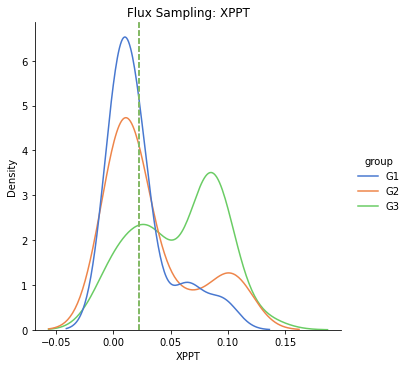

saving  None


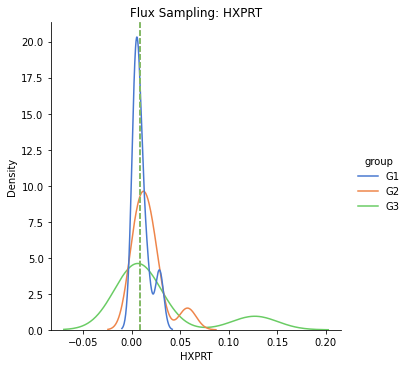

saving  None


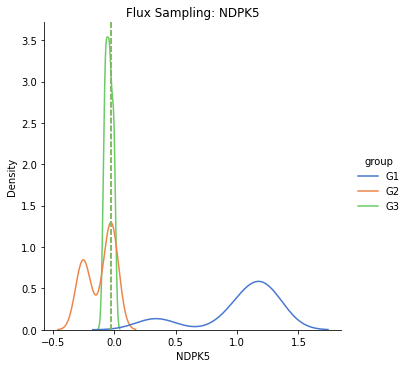

saving  None


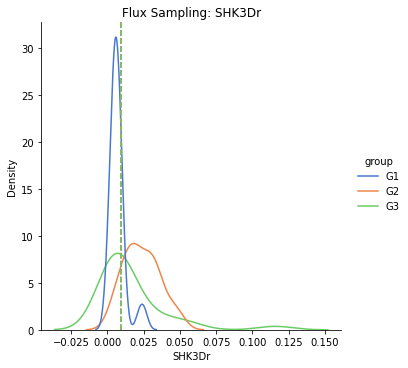

In [153]:
grp.plot_flux(method="sampling", constr="None", get_model_level=False, 
              rxn_ids=[r.id for r in iML1515.reactions[1:5]])

saving  None


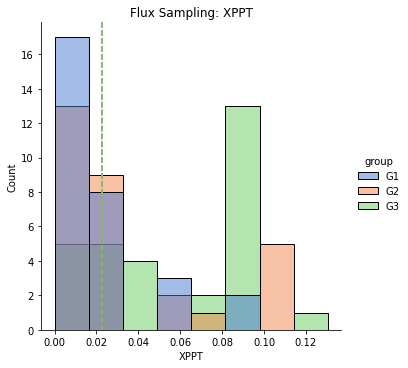

saving  None


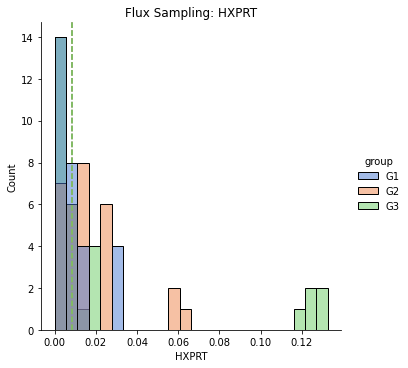

saving  None


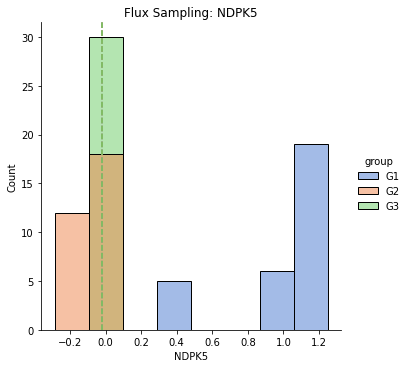

saving  None


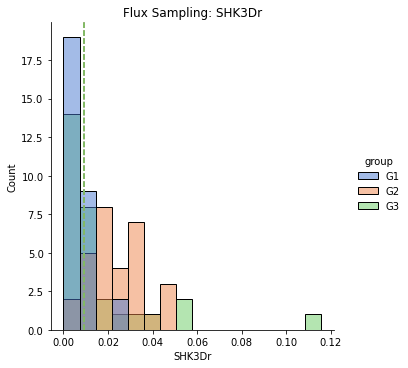

In [154]:
grp.plot_flux(method="sampling", constr="None", get_model_level=False,
              plotting_kind="hist",
              rxn_ids=[r.id for r in iML1515.reactions[1:5]])

Kruskal Wallis test result: stat: 11.267496947496909, p-value 0.0035751488270863154
saving  None


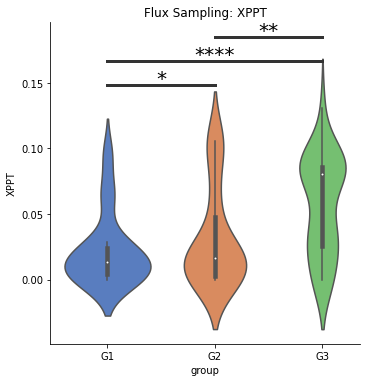

Kruskal Wallis test result: stat: 2.972698412698435, p-value 0.22619694834527856
saving  None


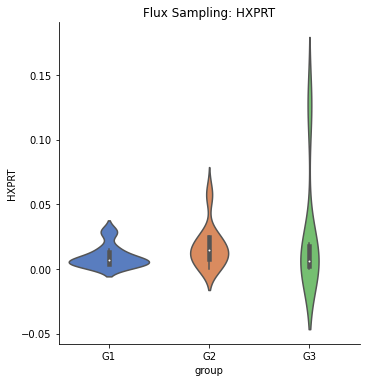

Kruskal Wallis test result: stat: 60.16742368742371, p-value 8.606170605213795e-14
saving  None


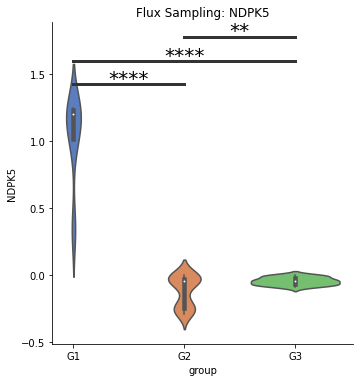

Kruskal Wallis test result: stat: 27.527032967032994, p-value 1.0533695006988863e-06
saving  None


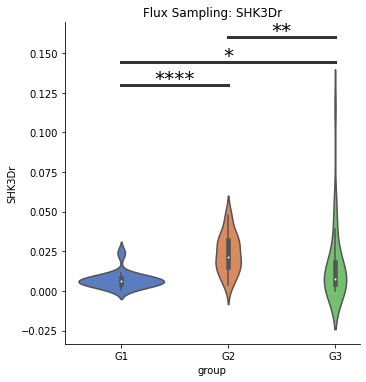

In [188]:
grp.plot_flux(method="sampling", constr="None", get_model_level=False,
              plotting_style="catplot",
              plotting_kind="violin",
              rxn_ids=[r.id for r in iML1515.reactions[1:5]])